# Análisis por productos

En este notebook vamos a realizar un Análisis Exploratorio de datos (EDA) tomando como base los productos de nuestro dataframe. En cada uno de los análisas vamos a dar una observación y terminar con unas conclusiones. 

In [2]:
#LIBRERIAS USADAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
tienda = pd.read_csv('tienda.csv')
tipos_de_datos = {
    'ID_PRODUCTO': 'object',
    'FECHA_COMPRA': 'datetime64[ns]',
    'CADUCIDAD': 'datetime64[ns]',
    'CANTIDAD': 'float64',
    'PRECIO_TOTAL': 'float64',
    'INDEX_CLIENTES': 'int32',
    'ETIQUETA_CANAL': 'int64',
    'CATEGORIA': 'object',
}
tienda = tienda.astype(tipos_de_datos)
tienda = tienda.loc[tienda['CANTIDAD'] >= 0]
tienda['mes'] = tienda['FECHA_COMPRA'].dt.month
tienda['semana'] = tienda['FECHA_COMPRA'].dt.isocalendar().week
tienda.head()

ID_PRODUCTO FECHA_COMPRA  CADUCIDAD  CANTIDAD  PRECIO_TOTAL  INDEX_CLIENTES  \
0    00026751   2023-07-29 2023-08-01      1.00          8.33               0   
1    00026751   2023-07-08 2023-10-01      0.59          4.94               5   
2    00026751   2023-07-08 2023-10-01      0.35          2.93               5   
3    00026751   2023-07-08 2023-10-01      0.32          2.64               5   
4    00026751   2023-07-09 2023-10-01      1.20         10.04               5   

   ETIQUETA_CANAL               CATEGORIA  mes  semana  
0               1  Salchichon i embutidos    7      30  
1               1  Salchichon i embutidos    7      27  
2               1  Salchichon i embutidos    7      27  
3               1  Salchichon i embutidos    7      27  
4               1  Salchichon i embutidos    7      27

# Análisis de los productos más vendidos en general

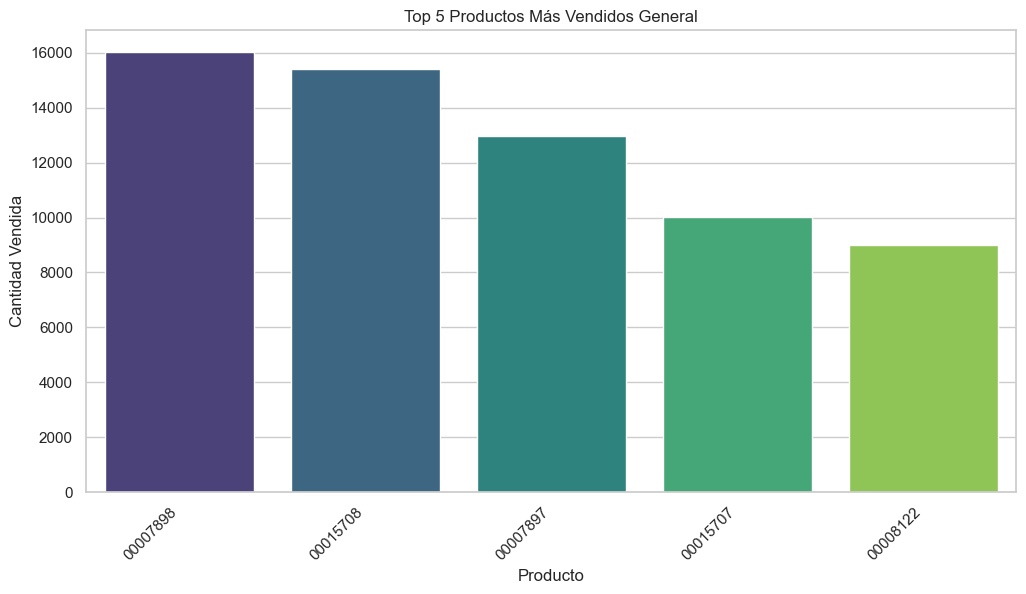

In [5]:
#LOS 5 PRODUCTOS MAS VENDIDOS EN TODOS LOS MESES
top_productos = tienda.groupby('ID_PRODUCTO')['CANTIDAD'].sum().reset_index()
top5_productos = top_productos.sort_values(by='CANTIDAD', ascending=False).head(5)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='ID_PRODUCTO', y='CANTIDAD', data=top5_productos, palette='viridis')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.title('Top 5 Productos Más Vendidos General')
plt.xticks(rotation=45, ha='right')
plt.show()

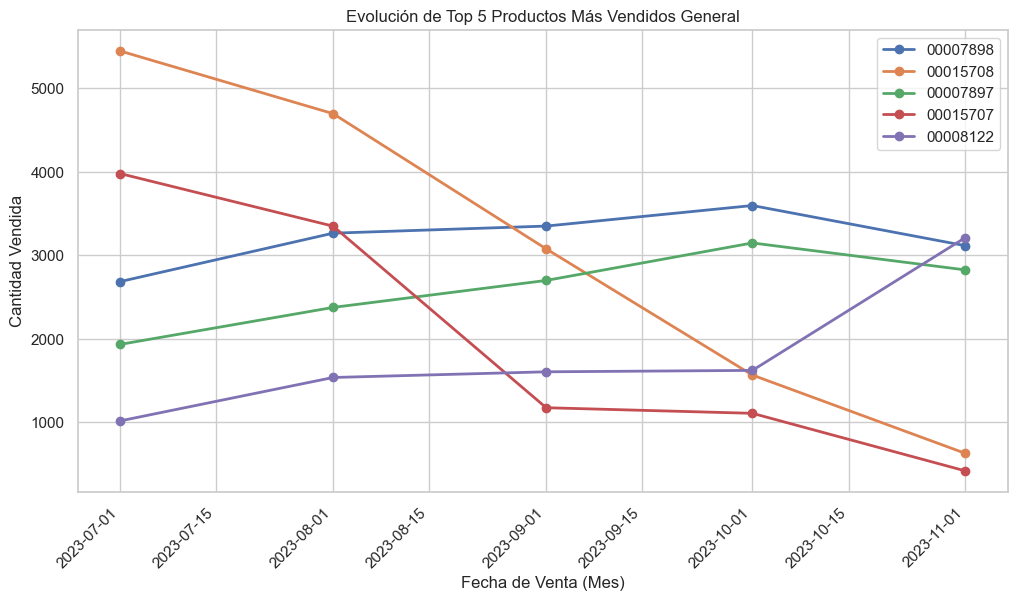

In [6]:
#LA EVOLUCION DE LOS 5 PRODUCTOS MAS VENDIDOS DURANTE 5 MESES
top5_productos = tienda.groupby('ID_PRODUCTO')['CANTIDAD'].sum().reset_index().nlargest(5, 'CANTIDAD')['ID_PRODUCTO']
df_top5 = tienda[tienda['ID_PRODUCTO'].isin(top5_productos)]
top5_productos_por_mes = df_top5.groupby(['ID_PRODUCTO', df_top5['FECHA_COMPRA'].dt.to_period("M")])['CANTIDAD'].sum().reset_index()
sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
for producto in top5_productos:
    datos_producto = top5_productos_por_mes[top5_productos_por_mes['ID_PRODUCTO'] == producto]
    plt.plot(datos_producto['FECHA_COMPRA'].dt.to_timestamp(), datos_producto['CANTIDAD'], label=producto, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Fecha de Venta (Mes)')
plt.ylabel('Cantidad Vendida')
plt.title('Evolución de Top 5 Productos Más Vendidos General')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()

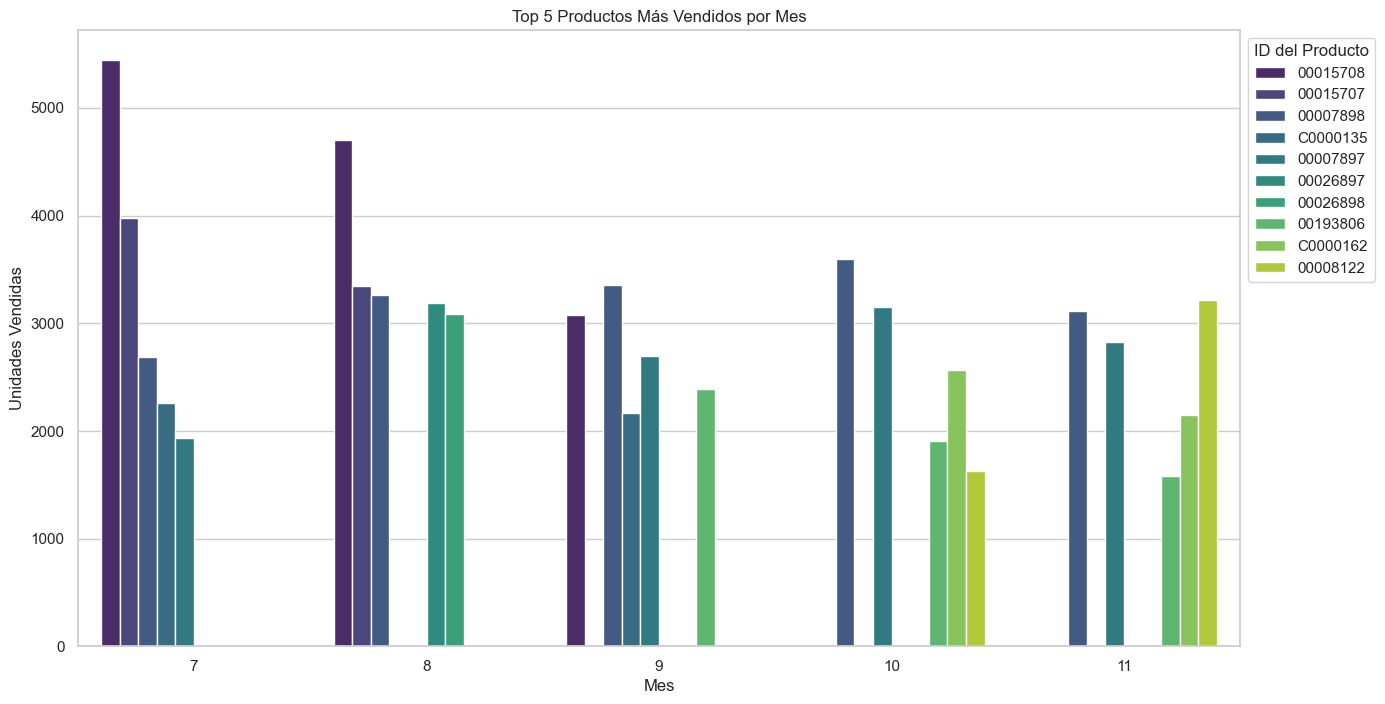

In [7]:
#LOS PRODUCTOS MAS VENDIDOS SEGUN MES
ventas_por_mes_producto = tienda.groupby(['mes', 'ID_PRODUCTO']).agg({'CANTIDAD': 'sum'}).reset_index()
ventas_por_mes_producto = ventas_por_mes_producto.sort_values(['mes', 'CANTIDAD'], ascending=[True, False])
top5_productos_por_mes = ventas_por_mes_producto.groupby('mes').head(5)


plt.figure(figsize=(15, 8))
sns.barplot(x='mes', y='CANTIDAD', hue='ID_PRODUCTO', data=top5_productos_por_mes, palette='viridis')
plt.title('Top 5 Productos Más Vendidos por Mes')
plt.xlabel('Mes')
plt.ylabel('Unidades Vendidas')
plt.legend(title='ID del Producto', bbox_to_anchor=(1, 1))
plt.show()

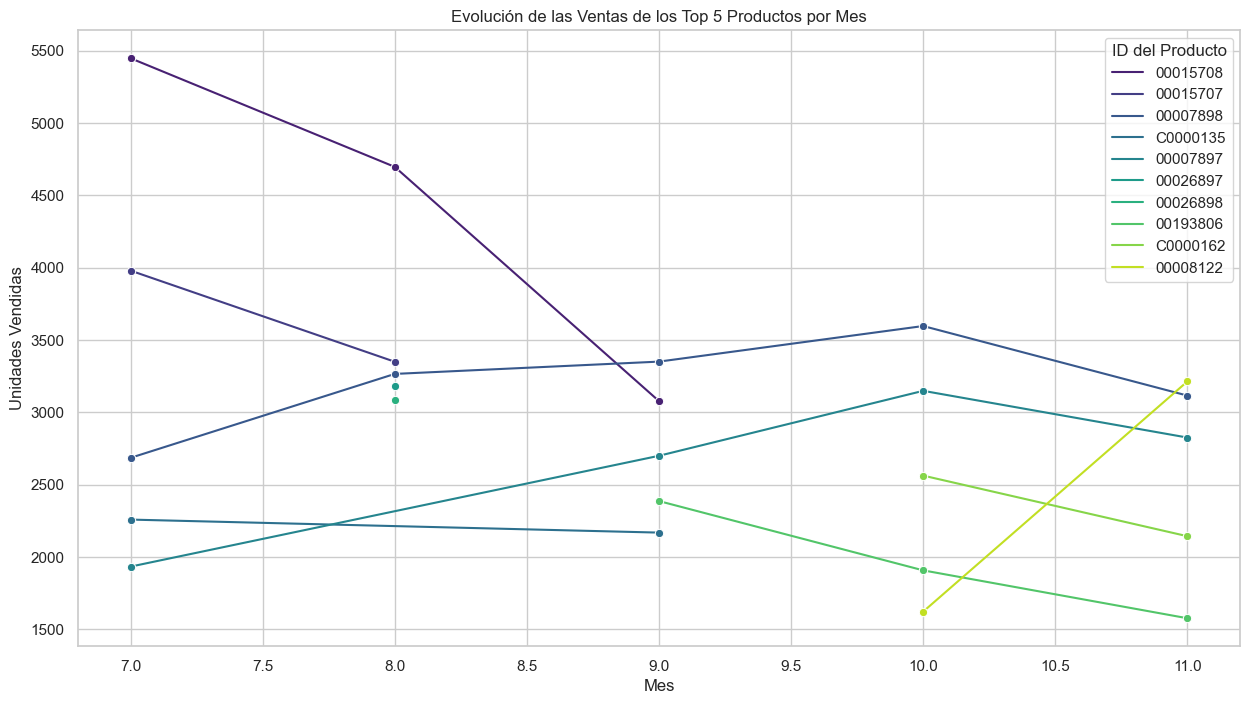

In [8]:
# Evolución de las Ventas de los Top 5 Productos por Mes
tienda['mes'] = tienda['FECHA_COMPRA'].dt.month
ventas_por_mes_producto = tienda.groupby(['mes', 'ID_PRODUCTO']).agg({'CANTIDAD': 'sum'}).reset_index()
ventas_por_mes_producto = ventas_por_mes_producto.sort_values(['mes', 'CANTIDAD'], ascending=[True, False])
top5_productos_por_mes = ventas_por_mes_producto.groupby('mes').head(5)


plt.figure(figsize=(15, 8))
sns.lineplot(x='mes', y='CANTIDAD', hue='ID_PRODUCTO', data=top5_productos_por_mes, palette='viridis', marker='o')
plt.title('Evolución de las Ventas de los Top 5 Productos por Mes')
plt.xlabel('Mes')
plt.ylabel('Unidades Vendidas')
plt.legend(title='ID del Producto', bbox_to_anchor=(1, 1))
plt.show()

## Observaciones
En el análisis de los productos más vendidos en general sólo encontramos uno que se vendió todos los meses, aunque al ver la evolución de las ventas de estos productos podemos ver que el primero tiene una tendencia de caída, en cambio el resto se mantiene casí en los mismos niveles. 

# Análisis de los productos más vendidos por canal de Venta

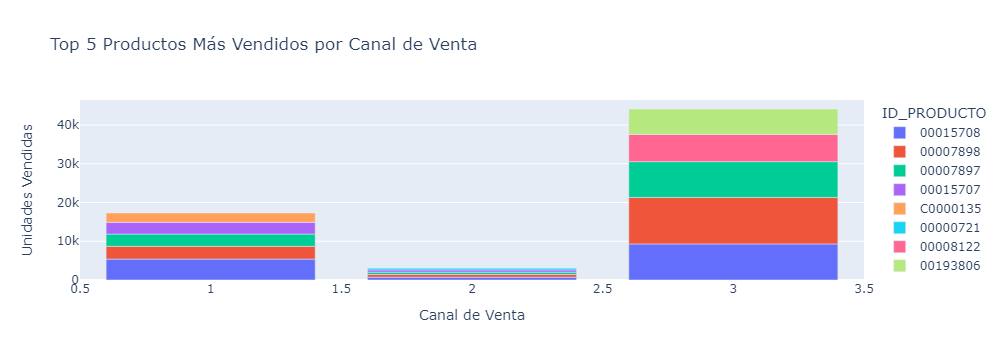

In [9]:
#LOS PRODUCTOS MAS VENDIDOS POR CANAL DE VENTA
canal_producto_group = tienda.groupby(['ETIQUETA_CANAL', 'ID_PRODUCTO']).agg({'CANTIDAD': 'sum'}).reset_index()
canal_producto_group = canal_producto_group.sort_values(['ETIQUETA_CANAL', 'CANTIDAD'], ascending=[True, False])
top5_productos_por_canal = canal_producto_group.groupby('ETIQUETA_CANAL').head(5)


fig = px.bar(top5_productos_por_canal, x='ETIQUETA_CANAL', y='CANTIDAD', color='ID_PRODUCTO',
             title='Top 5 Productos Más Vendidos por Canal de Venta',
             labels={'CANTIDAD': 'Unidades Vendidas', 'ETIQUETA_CANAL': 'Canal de Venta'},
             category_orders={'ETIQUETA_CANAL': sorted(top5_productos_por_canal['ETIQUETA_CANAL'].unique())})

fig.show()

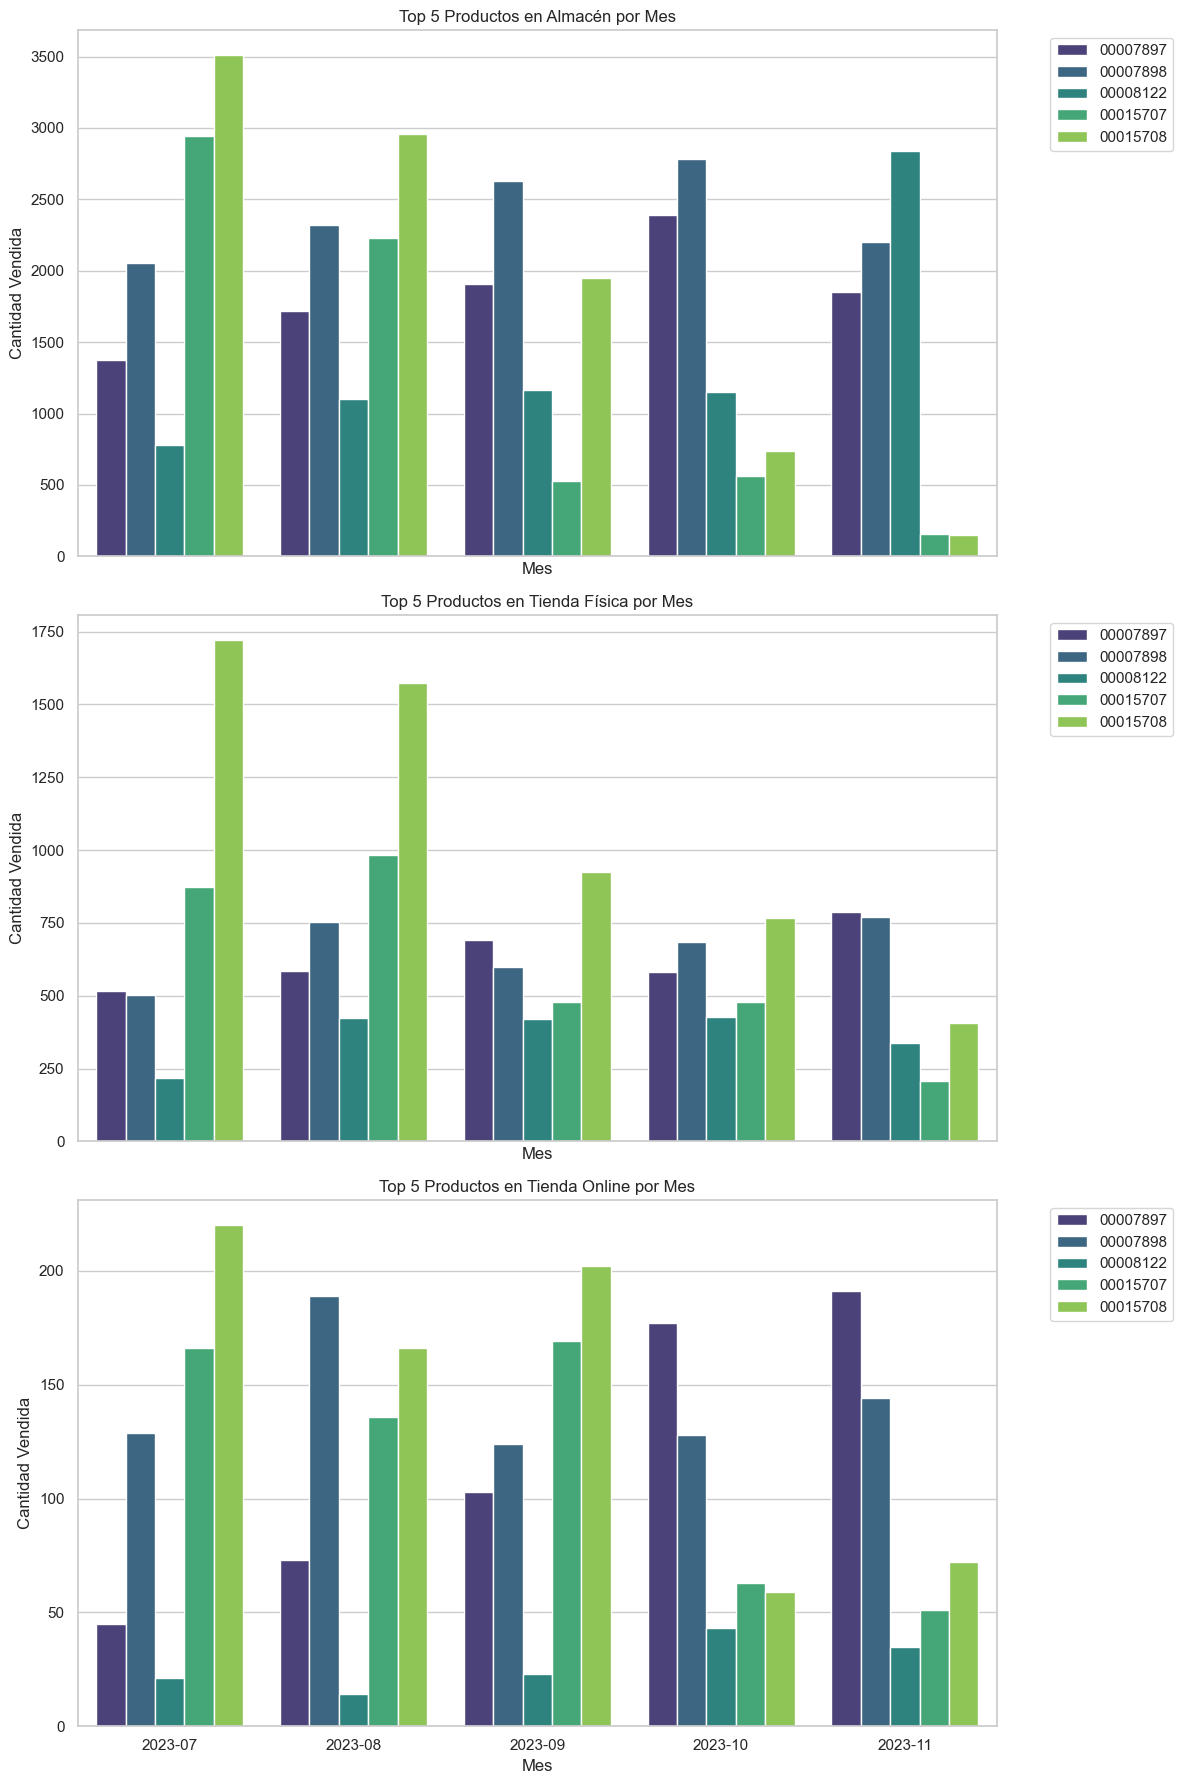

In [10]:
#LOS 5 PRODUCTOS MAS VENDIDOS POR CANAL DE VENTA POR CADA MES
etiquetas_canal = {1: 'Tienda Física', 2: 'Tienda Online', 3: 'Almacén'}  # Ajusta según tus etiquetas reales
tienda['ETIQUETA_CANAL'] = tienda['ETIQUETA_CANAL'].map(etiquetas_canal)
top5_productos = tienda.groupby('ID_PRODUCTO')['CANTIDAD'].sum().reset_index().nlargest(5, 'CANTIDAD')['ID_PRODUCTO']
df_top5 = tienda[tienda['ID_PRODUCTO'].isin(top5_productos)]
top5_productos_por_canal_y_mes = df_top5.groupby(['ETIQUETA_CANAL', df_top5['FECHA_COMPRA'].dt.to_period("M"), 'ID_PRODUCTO'])['CANTIDAD'].sum().reset_index()
sns.set(style="whitegrid")
canales_venta = top5_productos_por_canal_y_mes['ETIQUETA_CANAL'].unique()


fig, axes = plt.subplots(nrows=len(canales_venta), ncols=1, figsize=(12, 6 * len(canales_venta)), sharex=True)
for i, canal in enumerate(canales_venta):
    datos_canal = top5_productos_por_canal_y_mes[top5_productos_por_canal_y_mes['ETIQUETA_CANAL'] == canal]
    sns.barplot(x='FECHA_COMPRA', y='CANTIDAD', hue='ID_PRODUCTO', data=datos_canal, ax=axes[i], palette='viridis')
    axes[i].set_xlabel('Mes')
    axes[i].set_ylabel('Cantidad Vendida')
    axes[i].set_title(f'Top 5 Productos en {canal} por Mes')
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Obervaciones

El mejor canal de ventas es en almacen y aunque los productos vendidos son similares las ventas totales son proporcionales al canal de venta. 

# Análisis de los productos más vendidos por categoría

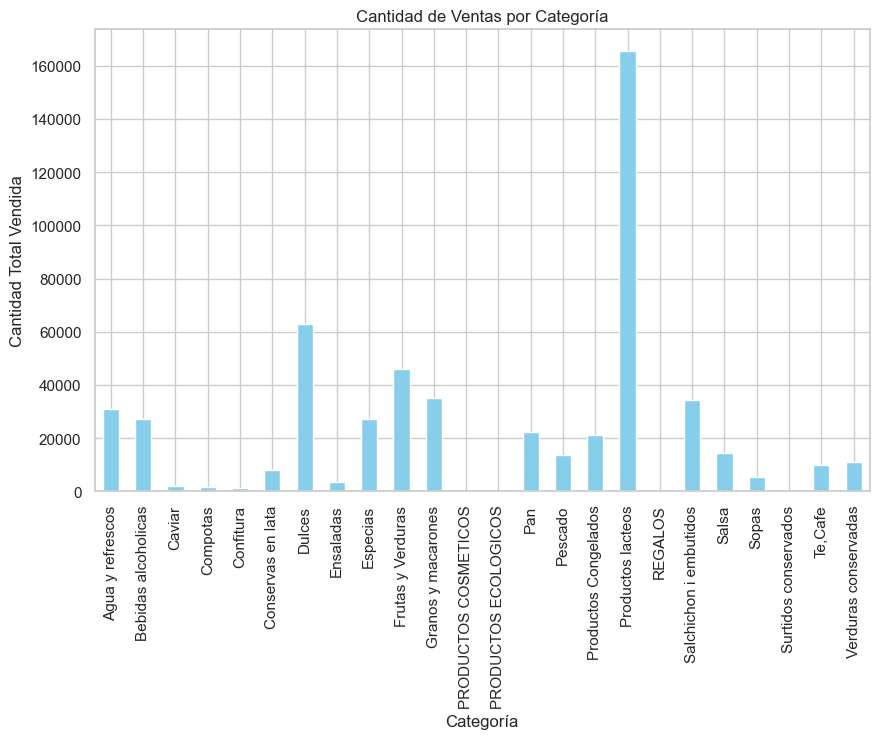

In [9]:
cantidad_por_categoria = tienda.groupby('CATEGORIA')['CANTIDAD'].sum()

plt.figure(figsize=(10, 6))
cantidad_por_categoria.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad Total Vendida')
plt.show()

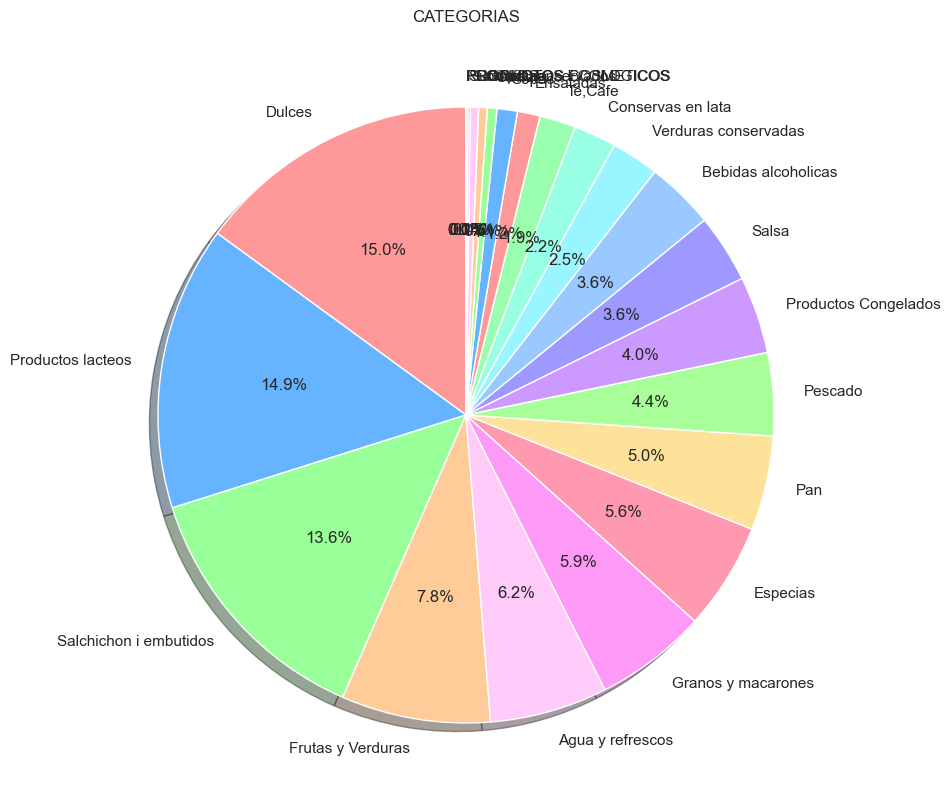

In [10]:
#Porcentaje de Ventas por categorías
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
count_classes = tienda['CATEGORIA'].value_counts()
plt.title("Categorias".upper())
colors = ['#ff9999','#66b3ff','#99ff99',
          '#ffcc99', '#ffccf9', '#ff99f8', 
          '#ff99af', '#ffe299', '#a8ff99',
          '#cc99ff', '#9e99ff', '#99c9ff',
          '#99f5ff', '#99ffe4', '#99ffaf']

plt.pie(count_classes, 
        labels = count_classes.index, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90, 
        colors=colors)

plt.show()

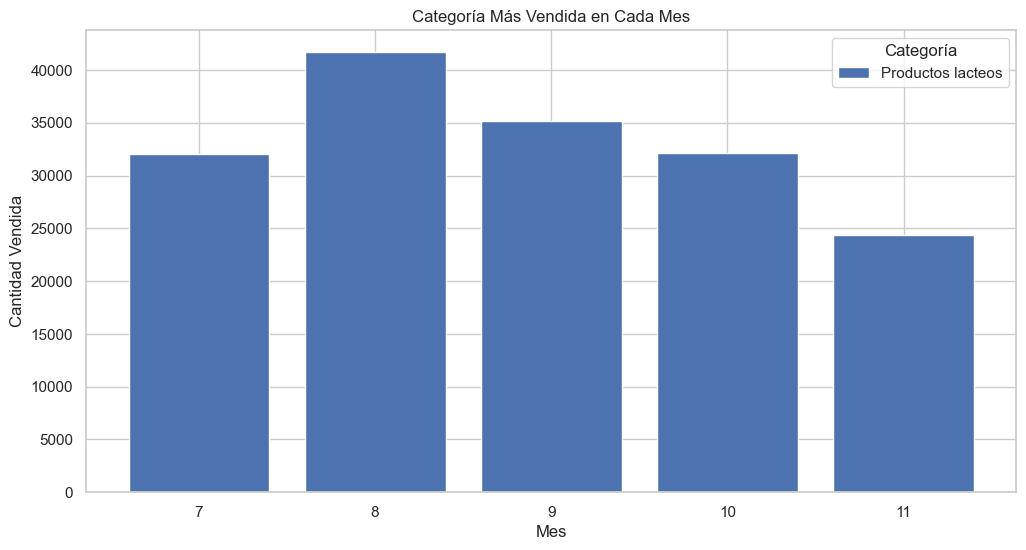

In [11]:
#Categoría Más Vendida por Mes
tienda['FECHA_COMPRA'] = pd.to_datetime(tienda['FECHA_COMPRA'])
tienda['MES'] = tienda['FECHA_COMPRA'].dt.month
ventas_por_mes_categoria = tienda.groupby(['MES', 'CATEGORIA'])['CANTIDAD'].sum().reset_index()
categoria_mas_vendida_por_mes = ventas_por_mes_categoria.loc[ventas_por_mes_categoria.groupby('MES')['CANTIDAD'].idxmax()]

plt.figure(figsize=(12, 6))
for categoria in categoria_mas_vendida_por_mes['CATEGORIA'].unique():
    datos_categoria = categoria_mas_vendida_por_mes[categoria_mas_vendida_por_mes['CATEGORIA'] == categoria]
    plt.bar(datos_categoria['MES'], datos_categoria['CANTIDAD'], label=categoria)

plt.title('Categoría Más Vendida en Cada Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.legend(title='Categoría')
plt.show()

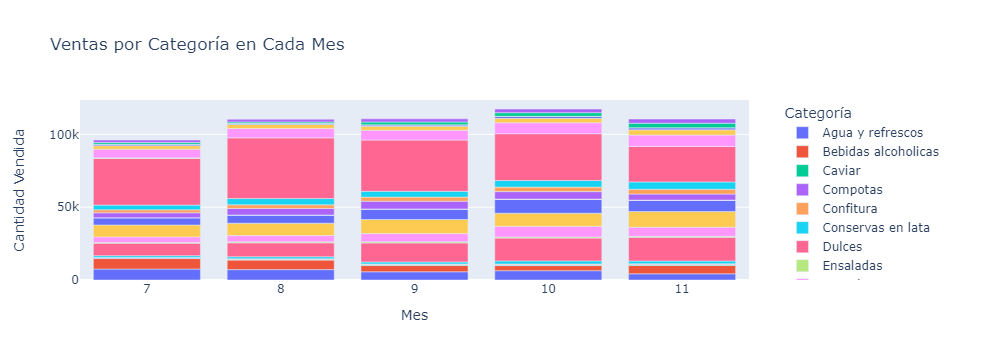

In [12]:
# Ventas por cada categoría en cada mes
tienda['FECHA_COMPRA'] = pd.to_datetime(tienda['FECHA_COMPRA'])
ventas_por_mes_categoria = tienda.groupby(['MES', 'CATEGORIA'])['CANTIDAD'].sum().reset_index()

fig = px.bar(ventas_por_mes_categoria, x='MES', y='CANTIDAD', color='CATEGORIA',
             labels={'CANTIDAD': 'Cantidad Vendida', 'MES': 'Mes'},
             title='Ventas por Categoría en Cada Mes')
fig.update_layout(legend=dict(title='Categoría', x=1.05, y=1, traceorder='normal'))
fig.show()

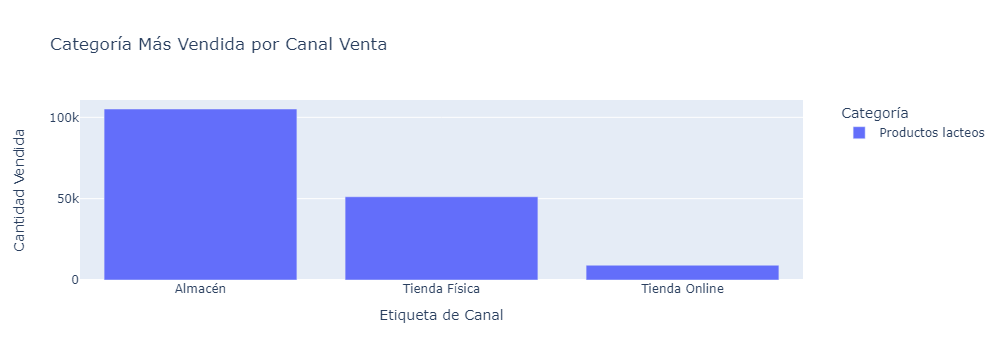

In [13]:
#Categoría producto más vendida por canal de venta
tienda['FECHA_COMPRA'] = pd.to_datetime(tienda['FECHA_COMPRA'])
ventas_por_categoria_canal = tienda.groupby(['CATEGORIA', 'ETIQUETA_CANAL'])['CANTIDAD'].sum().reset_index()
categoria_mas_vendida = ventas_por_categoria_canal.loc[ventas_por_categoria_canal.groupby('ETIQUETA_CANAL')['CANTIDAD'].idxmax()]

fig = px.bar(categoria_mas_vendida, x='ETIQUETA_CANAL', y='CANTIDAD', color='CATEGORIA',
             labels={'CANTIDAD': 'Cantidad Vendida', 'ETIQUETA_CANAL': 'Etiqueta de Canal'},
             title='Categoría Más Vendida por Canal Venta')
fig.update_layout(legend=dict(title='Categoría', x=1.05, y=1, traceorder='normal'))
fig.show()

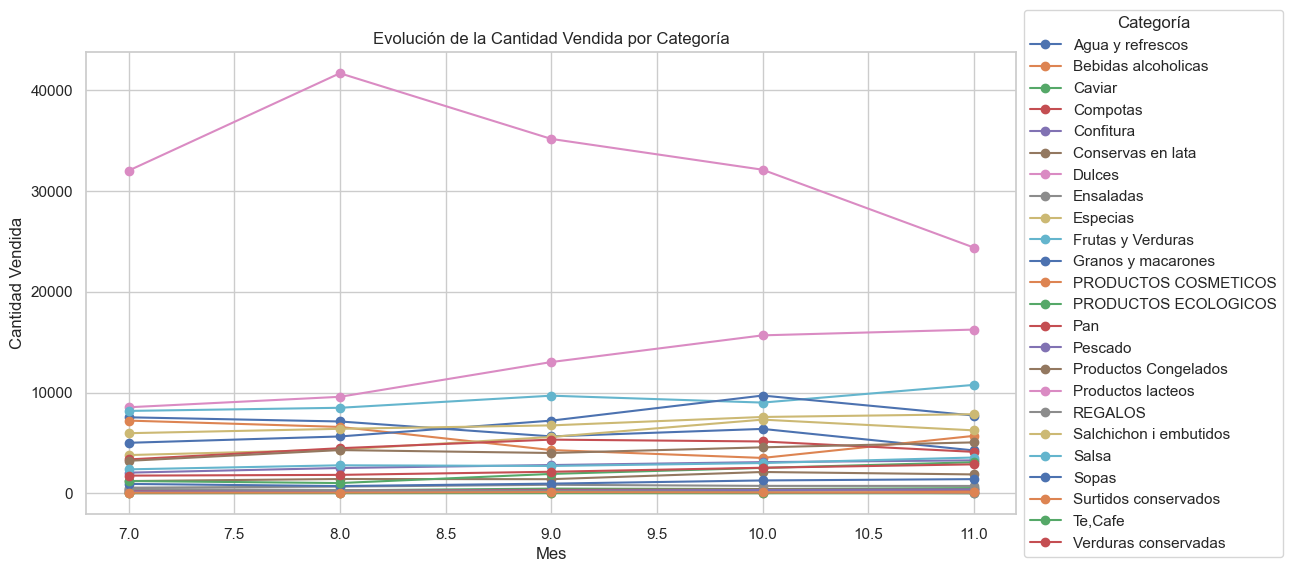

In [14]:
tienda['FECHA_COMPRA'] = pd.to_datetime(tienda['FECHA_COMPRA'])
tienda['MES'] = tienda['FECHA_COMPRA'].dt.month
ventas_por_mes_categoria = tienda.groupby(['MES', 'CATEGORIA'])['CANTIDAD'].sum().reset_index()

plt.figure(figsize=(12, 6))
for categoria in ventas_por_mes_categoria['CATEGORIA'].unique():
    datos_categoria = ventas_por_mes_categoria[ventas_por_mes_categoria['CATEGORIA'] == categoria]
    plt.plot(datos_categoria['MES'], datos_categoria['CANTIDAD'], label=categoria, marker='o')

plt.title('Evolución de la Cantidad Vendida por Categoría')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.legend(title='Categoría', loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

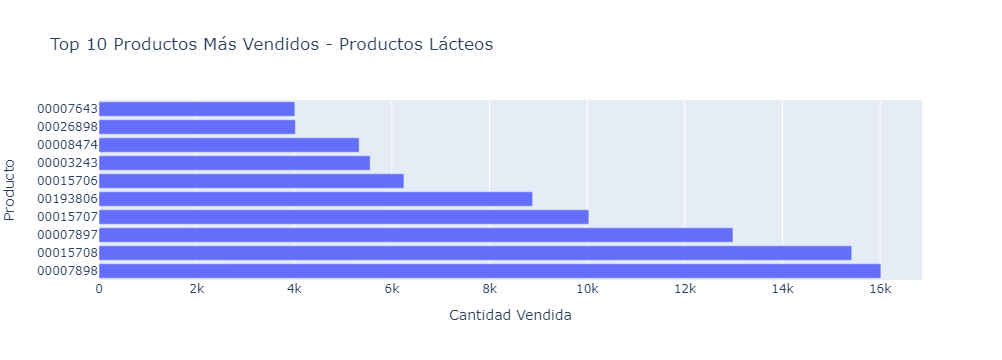

In [11]:
tienda['FECHA_COMPRA'] = pd.to_datetime(tienda['FECHA_COMPRA'])
productos_lacteos = tienda[tienda['CATEGORIA'] == 'Productos lacteos']
ventas_por_producto = productos_lacteos.groupby('ID_PRODUCTO')['CANTIDAD'].sum().reset_index()
ventas_por_producto = ventas_por_producto.sort_values(by='CANTIDAD', ascending=False)
top_10_productos = ventas_por_producto.head(10)
fig = px.bar(top_10_productos, x='CANTIDAD', y='ID_PRODUCTO',
             labels={'CANTIDAD': 'Cantidad Vendida', 'ID_PRODUCTO': 'Producto'},
             title='Top 10 Productos Más Vendidos - Productos Lácteos',
             orientation='h')
fig.show()

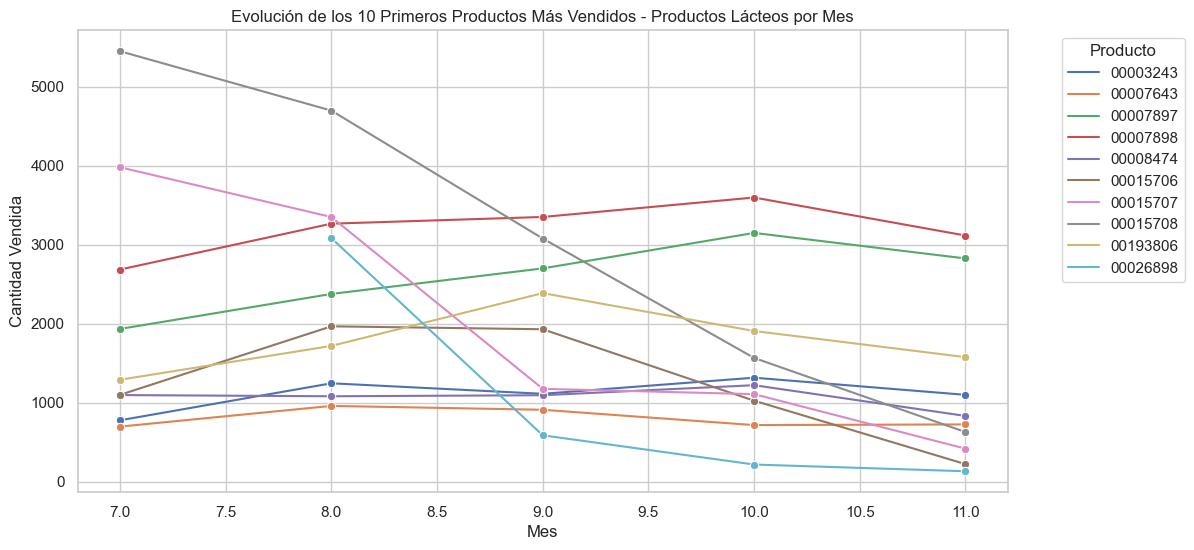

In [12]:
# Evolución de los 10 Primeros Productos Más Vendido de la categoría más vendida
tienda['FECHA_COMPRA'] = pd.to_datetime(tienda['FECHA_COMPRA'])
tienda['MES'] = tienda['FECHA_COMPRA'].dt.month
productos_lacteos = tienda[tienda['CATEGORIA'] == 'Productos lacteos']
ventas_por_mes_producto = productos_lacteos.groupby(['MES', 'ID_PRODUCTO'])['CANTIDAD'].sum().reset_index()
top_10_productos = ventas_por_mes_producto.groupby('ID_PRODUCTO')['CANTIDAD'].sum().nlargest(10).index
top_10_productos_data = ventas_por_mes_producto[ventas_por_mes_producto['ID_PRODUCTO'].isin(top_10_productos)]

# Crear el gráfico de líneas con seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_10_productos_data, x='MES', y='CANTIDAD', hue='ID_PRODUCTO', marker='o')
plt.title('Evolución de los 10 Primeros Productos Más Vendidos - Productos Lácteos por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## Observaciones

La categoría más vendida productos lácteos, seguida por dulces, pero con una gran diferencia. Las ventas de los productos lácteos son las más altas en todos los canales de venta, aunque se puede ver que la tiene una tendencia en caída. 

## Conclusiones
- A pesar de tener muchos productos y varias categorías, no todos los productos o categorías han generado ventas, por lo que la empresa puede centrar su stock en las categorías que más ventas generan. 
- La estacionalidad es un factor importante en la ventas de los productos, ya que podemos observar que no todas los productos se venden en todos los meses y eso ayuda a buscar patrones para los modelos de machine learning. 
- Al no haber mucha diferencia entre los productos más vendidos en los diferentes canales de ventas, podemos crear un modelo que funcione a los canales en general, por ahora al tener escasez de datos pero si la empresa proporciona más datos esto puede cambiar. 